In [1]:
import conformer_rl
from rdkit.Chem import AllChem
from conformer_rl.environments.environments import GibbsScoreLogPruningEnv
from conformer_rl.molecule_generation.molecules import mol_from_molFile
import time

start = time.time()
mol_config = mol_from_molFile('8monomers.mol', 1000)
env = GibbsScoreLogPruningEnv(mol_config, 1000)
print(time.time() - start)

/home/runxuanj/anaconda3/envs/my-rdkit-env/lib/python3.7/site-packages/torch/cuda/__init__.py:52: UserWarning: CUDA initialization: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx (Triggered internally at  /opt/conda/conda-bld/pytorch_1607370156314/work/c10/cuda/CUDAFunctions.cpp:100.)
  return torch._C._cuda_getDeviceCount() > 0


KeyboardInterrupt: 

In [8]:
# print(mol_config.E0, mol_config.Z0)
# E0: 426.1538271531945, Z0: 1.116382947893354
# print(len(env.nonring))
# 57
from rdkit.Chem import AllChem
from conformer_rl.analysis import drawConformer
mol = AllChem.MolFromMolFile('8monomers.mol')
drawConformer(mol)


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [7]:
import numpy as np
for i in range(1000):
    env.step(np.random.randint(0, 6, 57))

In [10]:
env.reset()
for i in range(200):
    start = time.time()
    obs, reward, done, info = env.step(np.random.randint(0, 6, 57))
    print("iteration", i, time.time() - start, "seconds", "reward:", reward)
    if done:
        env.reset()


/home/runxuanj/conformer_generation/conformer-ml/src/conformer_rl/environments/environment_components/reward_mixins.py:148: RuntimeWarning: divide by zero encountered in log
  total_reward = np.log(np.exp(-1.0 * (np.array(self.backup_energys) - config.E0) / (KB * config.tau)).sum() / config.Z0)


0.82462477684021 seconds
0.9543695449829102 seconds
0.8945951461791992 seconds
0.7516486644744873 seconds
0.9067957401275635 seconds
0.7674484252929688 seconds
0.7938625812530518 seconds
0.8788461685180664 seconds
0.8577237129211426 seconds
0.8028030395507812 seconds
0.8893709182739258 seconds
0.7406365871429443 seconds
0.7918879985809326 seconds
0.8971285820007324 seconds
0.8999137878417969 seconds
0.9327220916748047 seconds
0.7793529033660889 seconds
0.9328556060791016 seconds
0.9031116962432861 seconds
0.8336005210876465 seconds
0.7747669219970703 seconds
0.7631762027740479 seconds
0.8916239738464355 seconds
0.7678680419921875 seconds
0.7944972515106201 seconds
0.7921068668365479 seconds
0.8774683475494385 seconds
0.8524022102355957 seconds
0.9201350212097168 seconds
0.8088548183441162 seconds
0.8163466453552246 seconds
0.8900835514068604 seconds
0.7987504005432129 seconds
0.9373166561126709 seconds
0.7842855453491211 seconds
0.8650305271148682 seconds
0.7915005683898926 seconds
0.7

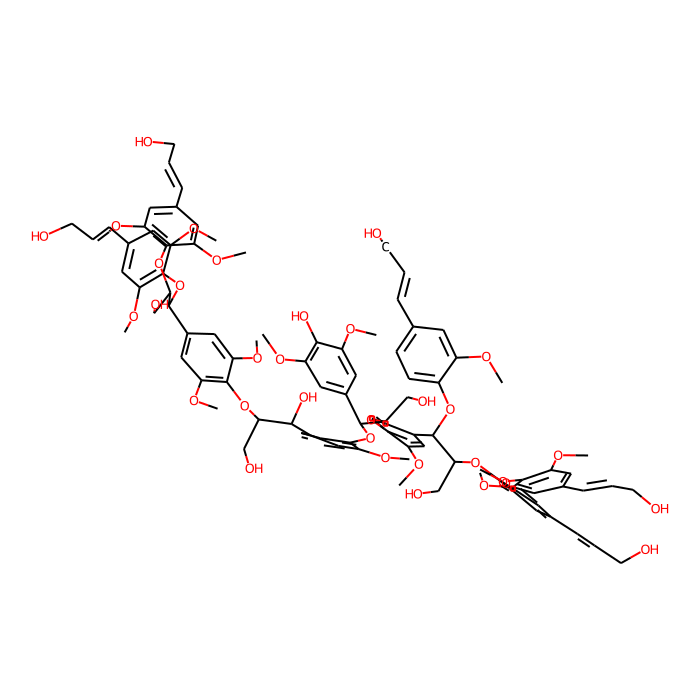

In [4]:
from rdkit.Chem import AllChem

from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw

IPythonConsole.drawOptions.addATomIndices=True
IPythonConsole.molSize = 700,700

m = AllChem.MolFromMolFile('8monomers.mol')
m